### Exploratory and Data Cleaning

In [19]:
import pandas as pd
import numpy as np
from functools import reduce
from matplotlib.ticker import PercentFormatter
from matplotlib import pyplot as plt


#import missingno as msno 
#!pip install missingno



### Printing shape and first description of columns

Shape: (891, 12)
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   

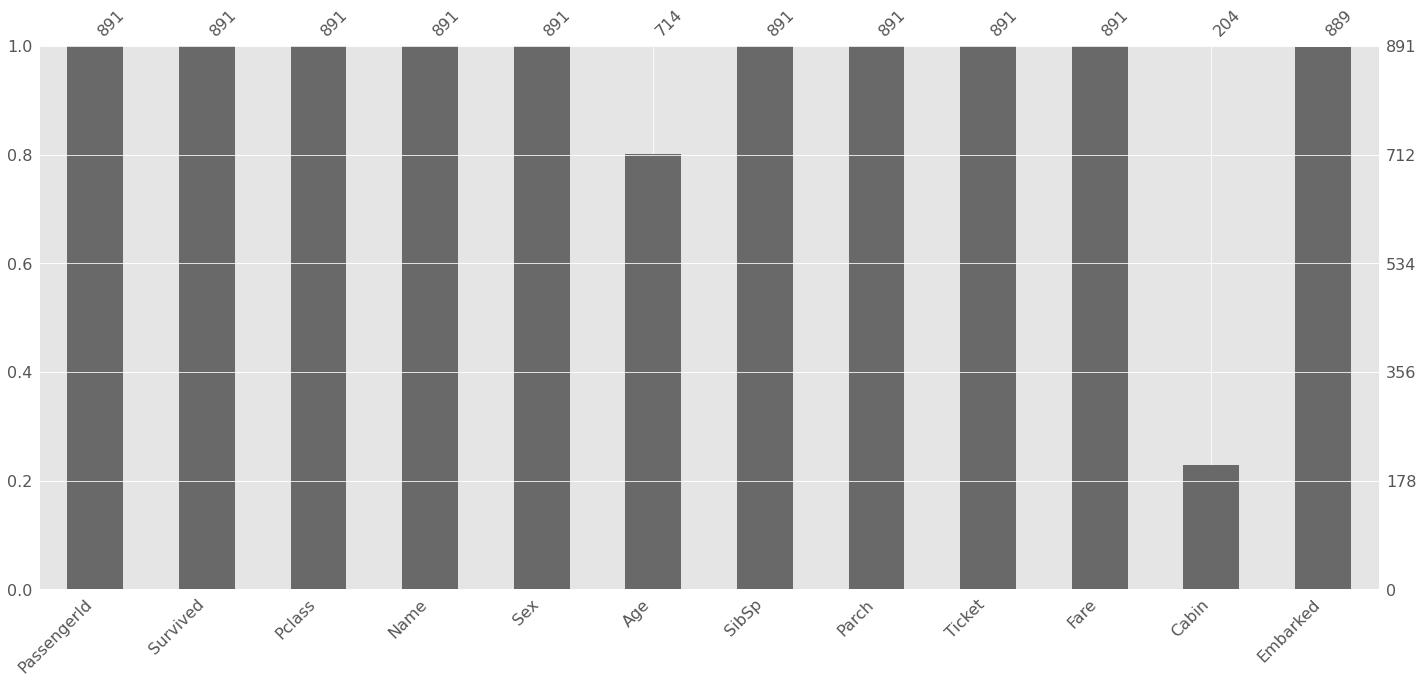

In [21]:
df = pd.read_csv('train.csv')
print("Shape: " + str(df.shape))
print(df.head())
print()
print(df.columns)
print(df.describe(include=np.object))
print()
print(df.describe())
#print(df.missing)

import missingno as msno 
print(msno.bar(df))


### Dropping and exploring Columns

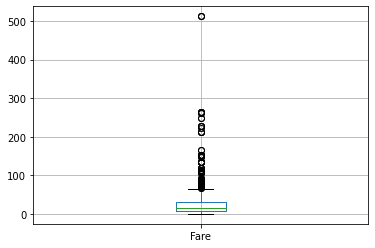

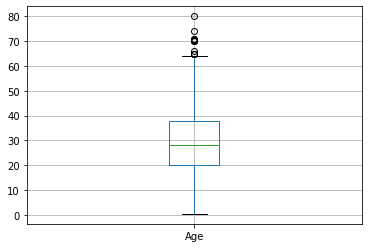

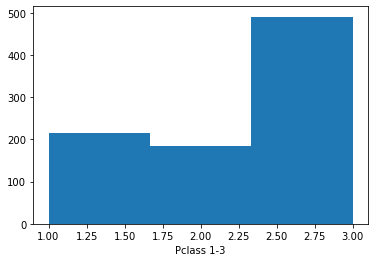

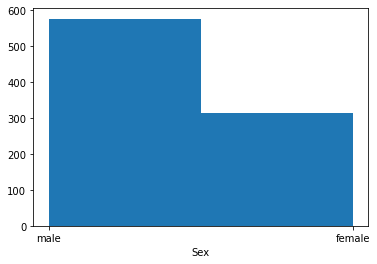

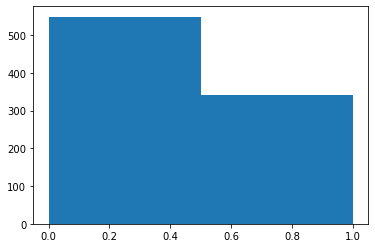

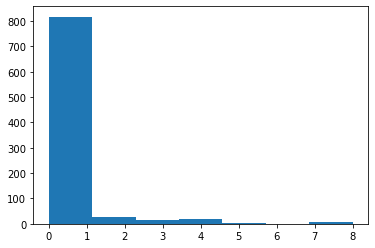

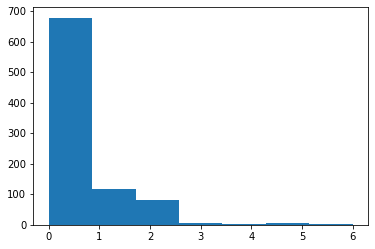

In [3]:
to_drop = ['PassengerId', 'Ticket']

df.drop(to_drop, inplace = True, axis = 1) #or: df.drop(columns = to_drop, inplace = True)
#print(df.head())

to_box = (['Fare', 'Age'])
to_histo = (['Pclass', 'Sex', 'Survived', 'SibSp', 'Parch'])
#boxplot1 = df.boxplot(column=to_box[0])


data1 = df[to_histo[0]];
data2 = df[to_histo[1]];
data3 = df[to_histo[2]];
data4 = df[to_histo[3]];
data5 = df[to_histo[4]];

boxplot2 = df.boxplot(column=to_box[0])
plt.show()
boxplot3 = df.boxplot(column=to_box[1])
plt.show()
#boxplot4 = df.boxplot(column=to_box[3])
#plt.show()
histo1 = plt.hist(data1,bins=len(list(set(data1))))
plt.xlabel('Pclass 1-3')
plt.show()
histo1 = plt.hist(data2,bins=len(list(set(data2))))
plt.xlabel('Sex')
plt.show()
histo1 = plt.hist(data3,bins=len(list(set(data3))))
plt.show()
histo1 = plt.hist(data4,bins=len(list(set(data4))))
plt.show()
histo1 = plt.hist(data5,bins=len(list(set(data5))))
plt.show()
plt.style.use('ggplot')



## Changing the index

In [4]:
#df = df.set_index('Identifier') #or: df.set_index('Identifier', inplace = True)
#df.head()


## Cleaning specific columns

In [5]:
unwanted_characters = ['[', ',', '-']

def clean_dates(item):
    dop= str(item.loc['Name'])
    
    if dop == 'nan' or dop[0] == '[':
        return np.NaN
    
    for character in unwanted_characters:
        if character in dop:
            character_index = dop.find(character)
            dop = dop[:character_index]
    
    return dop

#df['Name'] = df.apply(clean_dates, axis = 1)

df.tail()


def clean_Cabin(item):
    dop= str(item.loc['Cabin'])
    
    if dop == 'nan' or dop == np.NaN:
        dop = 0
    else:
        dop = 1
    
    return dop

df['Cabin'] = df.apply(clean_Cabin, axis=1)

df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,0,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,1,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,0,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,1,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,0,S


## Merging Columns

In [8]:
df['familyMembers'] = df['SibSp'] + df['Parch']

to_drop = ['Parch', 'SibSp']

df.drop(to_drop, inplace = True, axis = 1)


#pub = df['Place of Publication']
#df['Place of Publication'] = np.where(pub.str.contains('London'), 'London',
#    np.where(pub.str.contains('Oxford'), 'Oxford',
#        np.where(pub.eq('Newcastle upon Tyne'),
#            'Newcastle-upon-Tyne', df['Place of Publication'])))

## Correlations

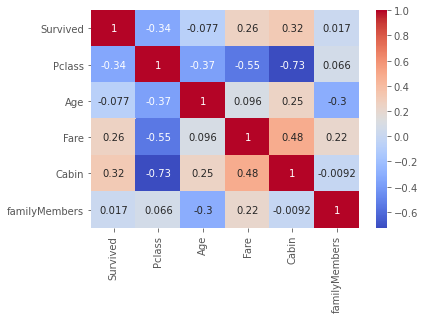

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

#corr2 = df2.corr()
correlations = df.corr()
#correlations
#sns.heatmap(corr2)
sns.heatmap(correlations,annot=True, cmap='coolwarm')
plt.show()

,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,familyMembers
0,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,0,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,1,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,0,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,1,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,0,S,0


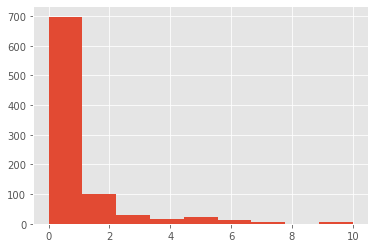

In [10]:
data = df['familyMembers'];
histo1 = plt.hist(data,bins=len(list(set(data))))

df.head()

In [11]:
def clean_title(item):
    title = str(item['Title'])
    
    if title == 'nan':
        return np.NaN
    
    if title[0] == '[':
        title = title[1: title.find(']')]
        
    if 'by' in title:
        title = title[:title.find('by')]
    elif 'By' in title:
        title = title[:title.find('By')]
        
    if '[' in title:
        title = title[:title.find('[')]

    title = title[:-2]
        
    title = list(map(str.capitalize, title.split()))
    return ' '.join(title)
    
df['Title'] = df.apply(clean_title, axis = 1)

KeyError: 'Title'

In [ ]:
df.head()

## Cleaning entire dataset

In [ ]:
university_towns = []

with open('Datasets\\university_towns.txt', 'r') as file:
    items = file.readlines()
    states = list(filter(lambda x: '[edit]' in x, items))
    
    for index, state in enumerate(states):
        start = items.index(state) + 1
        if index == 49: #since 50 states
            end = len(items)
        else:
            end = items.index(states[index + 1])
            
        pairs = map(lambda x: [state, x], items[start:end])
        university_towns.extend(pairs)
        
towns_df = pd.DataFrame(university_towns, columns = ['State', 'RegionName'])
towns_df.head()

In [ ]:
def clean_up(item):
    if '(' in item:
        return item[:item.find('(') - 1] #since space before '('
    
    if '[' in item:
        return item[:item.find('[')]
    

towns_df =  towns_df.applymap(clean_up)
towns_df.head()

## Renaming columns and skipping rows

In [ ]:
olympics_df = pd.read_csv('Datasets\olympics.csv', skiprows=1, header=0)
olympics_df.head()

In [ ]:
new_names = {'Unnamed: 0': 'Country',
           '? Summer': 'Summer Olympics',
           '01 !': 'Gold',
           '02 !': 'Silver',
           '03 !': 'Bronze',
           '? Winter': 'Winter Olympics',
           '01 !.1': 'Gold.1',
           '02 !.1': 'Silver.1',
           '03 !.1': 'Bronze.1',
           '? Games': '# Games', 
           '01 !.2': 'Gold.2',
           '02 !.2': 'Silver.2',
           '03 !.2': 'Bronze.2'}

olympics_df.rename(columns=new_names, inplace=1)
olympics_df.head()